# 第3章 ニューラルネットワーク

In [1]:
# 活性化関数の一つシグモイド関数
# パーセプトロンとニューラルネットワークの主な違いは活性化関数
# パーセプトロンでは活性化関数にステップ関数を使っている

from sympy import Symbol, exp

x = Symbol("x")
h = 1 / (1 + exp(-x))
h

1/(1 + exp(-x))

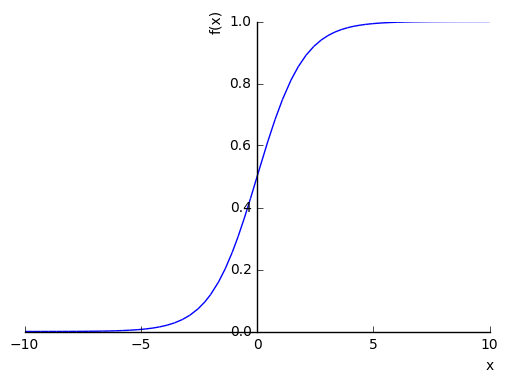

In [2]:
from sympy.plotting import plot

plot(h)

In [3]:
h.subs({x:1}).evalf()

0.731058578630005

In [4]:
h.subs({x:2}).evalf()

0.880797077977882

In [5]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
    
def step_function(x):
    y = x > 0
    return y.astype(np.int)

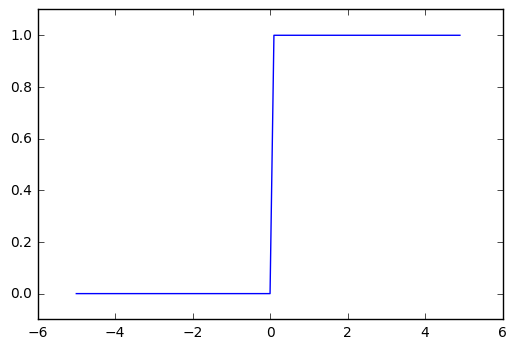

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

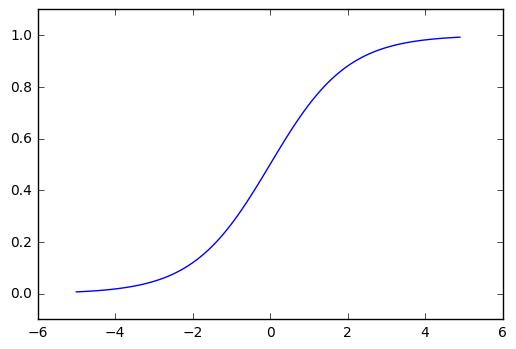

In [9]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [10]:
def relu(x):
    return np.maximum(0, x)

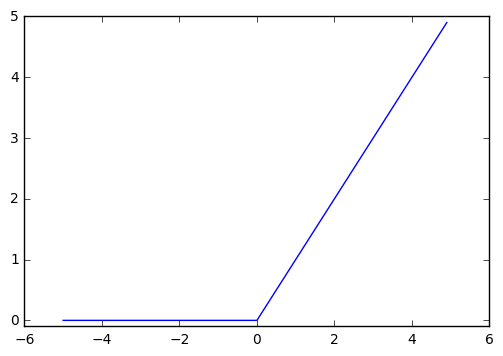

In [11]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.0)
plt.show()

次回

## 3.3 多次元配列の計算

デュエルスタンバイ

In [12]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)

[1 2 3 4]
1
(4,)


In [14]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [15]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [17]:
import numpy as np

X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])
print(X.shape)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


In [18]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1

print(A1)

[ 0.3  0.7  1.1]


In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [20]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)

[ 0.62624937  0.7710107 ]


In [21]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

# 出力層で利用する活性化関数は解く問題の性質に応じて決めるらしい
# 回帰問題では恒等関数
# 2クラス分類問題ではシグモイド関数
# 多クラス分類ではソフトマックス関数を使うのが一般的らしい

In [22]:
def identity_function(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

if __name__ == '__main__':
    network = init_network()
    x = np.array([1.0, 0.5])
    y = forward(network, x)
    print(y)

[ 0.31682708  0.69627909]


In [26]:
# ソフトマックス関数

a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [28]:
# このままだとオーバーフローする可能性がある
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


In [29]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


In [30]:
softmax(a)

array([ 0.01821127,  0.24519181,  0.73659691])

ソフトマックス関数を使用しても出力の大小は変わらない  
なので、出力層のソフトマックス計算は省略することもある

次回

## 3.6 手書き数字認識

デュエルスタンバイ

In [1]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize= False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)
